In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Data Loading**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load from keras dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[1,3,3] #Looking at one pixel value

0

In [9]:
train_labels.shape

(60000,)

In [13]:
train_labels[:10] #Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

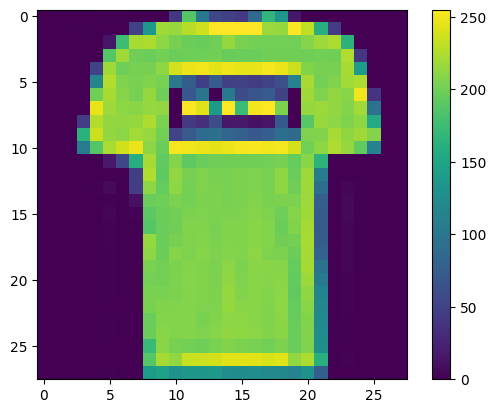

T-shirt/top ----> 0


In [19]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[0],"---->",train_labels[1])

**Preprocessing the Data**

In [20]:
#We will simply scale all our greyscale pixel values (0-255) to be between 0 and 1.
train_images = train_images / 255.0

test_images = test_images / 255.0

**Building the Model**

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])
#  Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape.
#            The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

#  Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this
#           layer. It has 128 neurons and uses the rectify linear unit activation function.

#  Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity
#           of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class.
#            This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

**Compile the Model**

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training**

In [23]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5052 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3790 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3415 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3156 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2990 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2822 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2701 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2589 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

**Evaluating**

In [25]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.3320 - accuracy: 0.8844
Test accuracy: 0.8844000101089478


**Prediction**

In [28]:
#Makes prediction for all the class for sample 0 ,so choose the outcome with highest probability
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([3.77143692e-07, 1.45299195e-08, 1.05923915e-11, 1.31606948e-10,
       5.68526870e-09, 3.50176299e-04, 7.36691730e-09, 1.26837790e-02,
       2.76254951e-07, 9.86965358e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

Choose one image from the test_images by specifying its index in the dataset9
Predicted value for sample: 9 is Label: Sneaker
Actual value for sample: 9 is Label: Sneaker


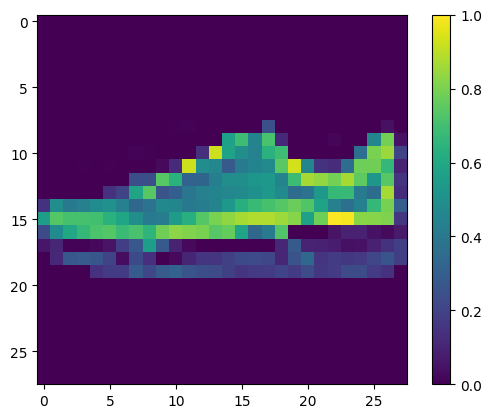

In [40]:
sample=int(input("Choose one image from the test_images by specifying its index in the dataset"))
output=np.argmax(predictions[sample])
print("Predicted value for sample:",sample,"is Label:",class_names[output])
print("Actual value for sample:",sample,"is Label:",class_names[test_labels[sample]])


plt.figure()
plt.imshow(test_images[sample])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 9
1/1 [==============================] - 0s 20ms/step


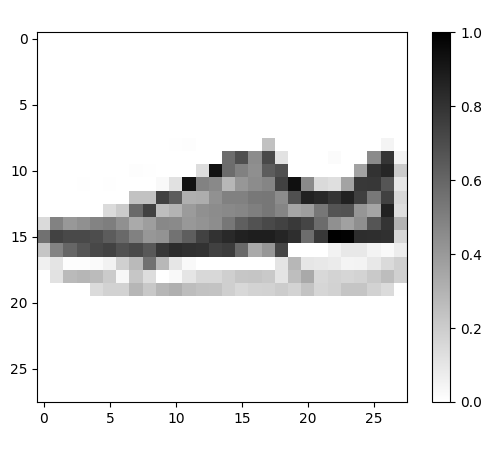

Actual class: Sneaker   Predicted class: Sneaker


In [47]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)
  print("Actual class:",class_names[correct_label],"  Predicted class:", predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
